<a href="https://colab.research.google.com/github/ryzhokhina/Tensorflow-Dev-Exam-Preparation/blob/main/03-cnn_multyclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras

In [3]:
import random
import numpy as np
import pandas as pd

In [4]:
import zipfile

In [5]:
!wget 'https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip'

--2023-06-21 21:04:43--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.234.128, 142.250.152.128, 142.250.128.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.234.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  45.8MB/s    in 6.1s    

2023-06-21 21:04:50 (81.2 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [6]:
zipref = zipfile.ZipFile('10_food_classes_all_data.zip','r')
zipref.extractall()
zipref.close()

In [7]:
import os

In [8]:
for path, dir, files in os.walk('/content/10_food_classes_all_data'):
  print(f"There are {len(files)} and {len(dir)} folders in {path}")

There are 0 and 2 folders in /content/10_food_classes_all_data
There are 0 and 10 folders in /content/10_food_classes_all_data/test
There are 250 and 0 folders in /content/10_food_classes_all_data/test/grilled_salmon
There are 250 and 0 folders in /content/10_food_classes_all_data/test/ice_cream
There are 250 and 0 folders in /content/10_food_classes_all_data/test/fried_rice
There are 250 and 0 folders in /content/10_food_classes_all_data/test/steak
There are 250 and 0 folders in /content/10_food_classes_all_data/test/hamburger
There are 250 and 0 folders in /content/10_food_classes_all_data/test/ramen
There are 250 and 0 folders in /content/10_food_classes_all_data/test/chicken_wings
There are 250 and 0 folders in /content/10_food_classes_all_data/test/chicken_curry
There are 250 and 0 folders in /content/10_food_classes_all_data/test/sushi
There are 250 and 0 folders in /content/10_food_classes_all_data/test/pizza
There are 0 and 10 folders in /content/10_food_classes_all_data/train


In [9]:
import matplotlib.image as mpimg

def view_random_image(target_dir, target_class):
  target_folder = os.path.join(target_dir, target_class)
  image_file = random.sample(os.listdir(target_folder),1)[0]
  image_arr = mpimg.imread(os.path.join(target_folder, image_file))

  plt.imshow(image_arr)
  plt.title(target_class)
  plt.axis("off")
  print(f"Shape of image{image_arr.shape}")
  plt.show()


Shape of image(512, 341, 3)


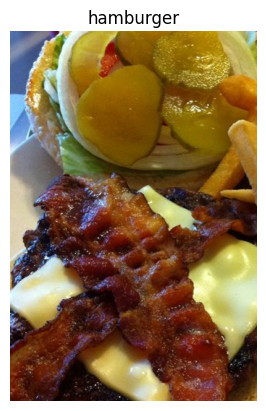

In [10]:
view_random_image('/content/10_food_classes_all_data/train', 'hamburger')

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
train_gen = ImageDataGenerator(rescale=1./255,
                               horizontal_flip = True,
                               vertical_flip = True,
                               shear_range = 0.4,
                               zoom_range = 0.3)

test_gen = ImageDataGenerator(rescale=1./255)


In [22]:
train_data = train_gen.flow_from_directory(
    '/content/10_food_classes_all_data/train',
    batch_size = 32,
    shuffle = True,
    target_size = (128,128),
    class_mode = "sparse",
    seed = 42)

Found 7500 images belonging to 10 classes.


In [23]:
train_data.class_indices

{'chicken_curry': 0,
 'chicken_wings': 1,
 'fried_rice': 2,
 'grilled_salmon': 3,
 'hamburger': 4,
 'ice_cream': 5,
 'pizza': 6,
 'ramen': 7,
 'steak': 8,
 'sushi': 9}

In [58]:
test_data = test_gen.flow_from_directory('/content/10_food_classes_all_data/train',
                                         target_size = (128,128),
                                         class_mode = 'sparse',
                                         shuffle = False)

Found 7500 images belonging to 10 classes.


In [25]:
test_data.class_indices

{'chicken_curry': 0,
 'chicken_wings': 1,
 'fried_rice': 2,
 'grilled_salmon': 3,
 'hamburger': 4,
 'ice_cream': 5,
 'pizza': 6,
 'ramen': 7,
 'steak': 8,
 'sushi': 9}

In [26]:
img, cls = train_data.next()

1.0


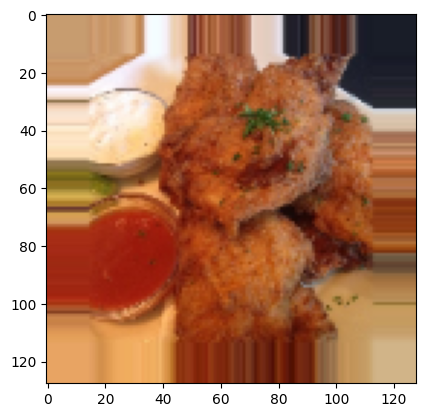

In [27]:
plt.imshow(img[0])
print(cls[0])

In [28]:
num_classes = len(train_data.class_indices)

In [29]:
from tensorflow.keras import layers

model = tf.keras.Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation = 'softmax')
])

In [30]:
model.compile(optimizer='Adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(), metrics= ['accuracy'])


In [31]:
history = model.fit(train_data, epochs = 10, validation_data = test_data)

Epoch 1/10
235/235 [==============================] - 98s 395ms/step - loss: 2.1731 - accuracy: 0.1996 - val_loss: 1.9947 - val_accuracy: 0.2936
Epoch 2/10
235/235 [==============================] - 99s 421ms/step - loss: 1.9832 - accuracy: 0.2963 - val_loss: 1.9014 - val_accuracy: 0.3348
Epoch 3/10
235/235 [==============================] - 94s 401ms/step - loss: 1.8870 - accuracy: 0.3464 - val_loss: 1.8147 - val_accuracy: 0.3708
Epoch 4/10
235/235 [==============================] - 93s 396ms/step - loss: 1.8375 - accuracy: 0.3671 - val_loss: 1.7892 - val_accuracy: 0.3785
Epoch 5/10
235/235 [==============================] - 91s 387ms/step - loss: 1.7635 - accuracy: 0.3928 - val_loss: 1.7168 - val_accuracy: 0.4059
Epoch 6/10
235/235 [==============================] - 91s 389ms/step - loss: 1.7061 - accuracy: 0.4113 - val_loss: 1.6072 - val_accuracy: 0.4485
Epoch 7/10
235/235 [==============================] - 100s 426ms/step - loss: 1.6432 - accuracy: 0.4341 - val_loss: 1.5601 - val_a

<Axes: >

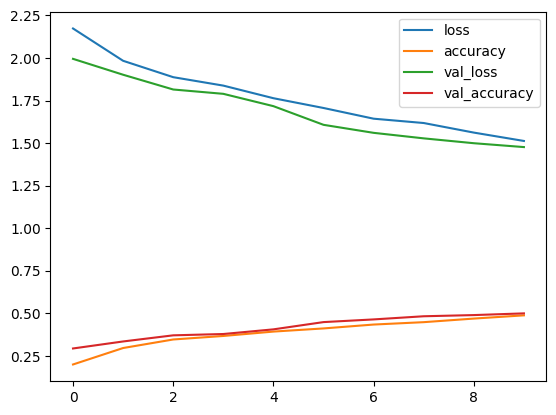

In [32]:
pd.DataFrame(history.history).plot()

In [59]:
model.evaluate(test_data)

235/235 [==============================] - 36s 152ms/step - loss: 1.4764 - accuracy: 0.4997


[1.476441502571106, 0.4997333288192749]

In [80]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [61]:
predict= model.predict(test_data)

235/235 [==============================] - 35s 149ms/step


In [62]:
predict_classes = np.argmax(predict, axis = 1)

In [63]:
predict_classes

array([0, 6, 7, ..., 7, 9, 7])

In [41]:
test_data.classes

array([0, 0, 0, ..., 9, 9, 9], dtype=int32)

In [42]:
len(test_data.classes)

7500

In [64]:
class_labels = test_data.class_indices.keys()

In [65]:
report = classification_report(test_data.classes, predict_classes, target_names=class_labels)
print(report)

                precision    recall  f1-score   support

 chicken_curry       0.57      0.33      0.42       750
 chicken_wings       0.57      0.50      0.54       750
    fried_rice       0.44      0.60      0.51       750
grilled_salmon       0.67      0.29      0.41       750
     hamburger       0.40      0.49      0.44       750
     ice_cream       0.55      0.53      0.54       750
         pizza       0.53      0.60      0.56       750
         ramen       0.53      0.60      0.56       750
         steak       0.41      0.72      0.52       750
         sushi       0.64      0.32      0.43       750

      accuracy                           0.50      7500
     macro avg       0.53      0.50      0.49      7500
  weighted avg       0.53      0.50      0.49      7500



In [74]:
list(class_labels)

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [78]:
cfm = confusion_matrix(test_data.classes, predict_classes)

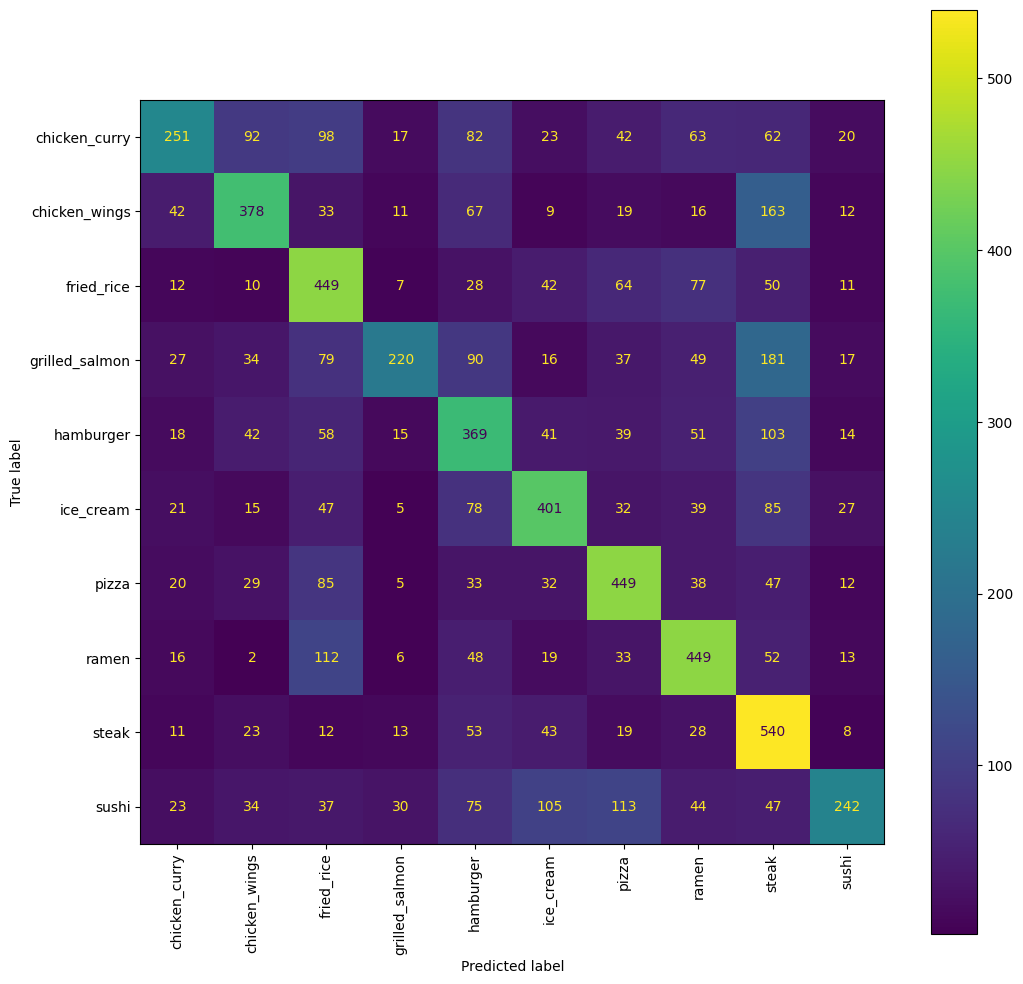

In [95]:
fig, ax = plt.subplots(figsize = (12,12))
cfmd = ConfusionMatrixDisplay(cfm, display_labels = list(class_labels))
cfmd.plot(ax = ax, xticks_rotation = 'vertical')
plt.show()